In [16]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import random
import copy

In [28]:
random_graph = nx.erdos_renyi_graph(20, 0.3)

In [25]:
dir(random_graph)
random_graph.degree()

DegreeView({0: 6, 1: 1, 2: 10, 3: 5, 4: 4, 5: 6, 6: 5, 7: 2, 8: 7, 9: 5, 10: 5, 11: 4, 12: 7, 13: 8, 14: 6, 15: 6, 16: 4, 17: 7, 18: 5, 19: 7})

In [26]:
#ataque determinístico
def deterministic_attack(graph):
    nodes = list(graph.degree())
    sorted(nodes, key=lambda x: x[1], reverse=True)
    node = nodes[0]
    graph.remove_node(node[0])

In [13]:
random2 = copy.deepcopy(random_graph)
deterministic_attack(random2)

[(0, 6), (1, 6), (2, 2), (3, 6), (4, 9), (5, 6), (6, 8), (7, 4), (8, 5), (9, 2), (10, 8), (11, 2), (12, 5), (13, 5), (14, 5), (15, 6), (16, 9), (17, 6), (18, 6), (19, 4)]
(0, 6)


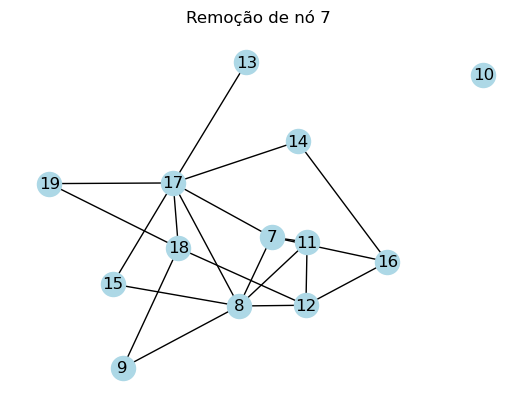

In [29]:
def update(frame, G, pos, ax):
    ax.clear()  # Limpa o gráfico
    ax.set_title(f"Remoção de nó {frame + 1}")
    
    # Desenha o grafo
    nx.draw(G, pos, with_labels=True, node_color="lightblue", ax=ax)
    
    if len(G.nodes()) > 0:  # Somente remove nó se houver nós no grafo
        # Executa o ataque determinístico
        deterministic_attack(G)

# Função principal para gerar a animação
def animate_attack(num_iterations, random_graph):
    G = random_graph  # Copia o grafo inicial
    pos = nx.spring_layout(G)  # Layout dos nós
    fig, ax = plt.subplots()  # Cria a figura
    
    # Cria a animação
    ani = FuncAnimation(fig, update, frames=num_iterations, fargs=(G, pos, ax), repeat=False, interval=1000)
    
    # Exibe a animação em vídeo HTML
    return HTML(ani.to_html5_video())

# Definindo o número de iterações para a animação
num_iterations = 7  # Número de vértices a serem removidos
animate_attack(num_iterations, random_graph)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random

# Usando o backend interativo do Jupyter Notebook
%matplotlib notebook

# Função de Caminhada Aleatória
def random_walk(graph, start_node, steps):
    current_node = start_node
    path = [current_node]
    
    for _ in range(steps):
        neighbors = list(graph.neighbors(current_node))
        if len(neighbors) == 0:
            break  # Para se não houver vizinhos
        current_node = random.choice(neighbors)
        path.append(current_node)
    
    return path

# Criação de um grafo aleatório
G = nx.erdos_renyi_graph(20, 0.3)

# Caminhada Aleatória
start_node = random.choice(list(G.nodes))
steps = 10
random_walk_path = random_walk(G, start_node, steps)

# Visualização do grafo
pos = nx.spring_layout(G)

# Função para atualizar o frame da animação
def update(num):
    plt.clf()  # Limpa a figura para cada frame
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    # Colore os nós visitados até o passo atual
    nx.draw_networkx_nodes(G, pos, nodelist=random_walk_path[:num+1], node_color='red')
    # Desenha as arestas percorridas
    edges = [(random_walk_path[i], random_walk_path[i+1]) for i in range(num)]
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='red')

# Criação da animação
fig = plt.figure()
# ani = FuncAnimation(fig, update, frames=len(random_walk_path), interval=500, repeat=False)

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Criação da animação
ani = FuncAnimation(fig, update, frames=len(random_walk_path), interval=500, repeat=False)

# Salva a animação como HTML5 e exibe no notebook
HTML(ani.to_html5_video())
